In [ ]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import re

URL = 'https://kolesa.kz/cars/'
HEADERS = {'user-agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/93.0.4577.82 Safari/537.36',
          'accept':'*/*'}

data = {'name':[],'price':[],'text':[],'link':[]}
def get_html(url, params = None):
    r = requests.get(url,headers = HEADERS,params = params)
    return r

    


def get_content(html):
    soup = BeautifulSoup(html,'html.parser')
    items = soup.find_all('div',class_ ='a-info-side col-right-list')
    #print(items)
    for item in items:
        data['name'].append(item.find('a',class_ ="list-link ddl_product_link").get_text().strip())
        data['price'].append(item.find('span',class_ ="price").get_text().strip())
        data['text'].append(item.find('div',class_ ="a-search-description").get_text().strip())
        #data['year'].append( l.split(',')[0]
        data['link'].append(item.find('a',class_ ="list-link ddl_product_link").get('href').strip())
        #link = 'https://kolesa.kz/' + link
        #data.append(URL_domen+i)
    
        
def parse():
    #300 страниц
    for i in range(1,300):
        html = get_html(URL + '?page='+str(i))

        if html.status_code == 200:

            get_content(html.text)

        else:
            print('Error: 1')
        
        
parse()

In [ ]:
df = pd.DataFrame(data)
df.head()


In [ ]:
df.link = 'https://kolesa.kz/' + df.link
df['id'] = [i[-1] for i in df.link.str.split('/').values]
df['year'] = [re.findall(r'\d+',i[0])[0] for i in df.text.str.split(',').values]
df['quality'] = [i[1].split(' ')[1] for i in df.text.str.split(',').values]
df['type'] = [i[1].split(' ')[2] for i in df.text.str.split(',').values]
df['volume_l'] = [i[2].split(' ')[1] for i in df.text.str.split(',').values]
df['fuel_type'] = [i[3] for i in df.text.str.split(',').values]
df['Kpp'] = [i[4]  if len(i)>4  else'None' for i in df.text.str.split(',').values]
df['price'] = [''.join(i) for i in df.price.str.findall(r'\d+')]
df['price'] = df['price'].astype(int)
df['year'] = df['year'].astype(int)
df.id = df.id.astype(int) 

df = df[['id','name','price','year','quality','type','volume_l','fuel_type','Kpp','text','link']]

df.head()

<AxesSubplot:title={'center':'mean price by year'}, xlabel='year'>

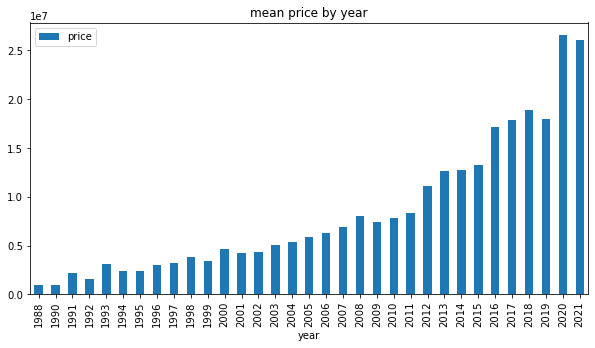

In [103]:
df[df.name.str.find(r'Toyota') == 0][['price','year']].groupby('year').mean().plot(kind = 'bar', title = 'mean price by year',figsize=(10,5))

In [104]:
df

,id,name,price,year,quality,type,volume_l,fuel_type,Kpp,text,link
0,125749236,Mazda 626,1500000,1993,Б/у,лифтбек,1.9,бензин,КПП механика,"1993 г., Б/у лифтбек, 1.9 л, бензин, КПП механ...",https://kolesa.kz//a/show/125749236
1,125753448,Toyota Camry,12800000,2019,Б/у,седан,2.5,бензин,КПП автомат,"2019 г., Б/у седан, 2.5 л, бензин, КПП автомат...",https://kolesa.kz//a/show/125753448
2,125487063,Ford Focus,2500000,2007,Б/у,хэтчбек,1.6,бензин,КПП автомат,"2007 г., Б/у хэтчбек, 1.6 л, бензин, КПП автом...",https://kolesa.kz//a/show/125487063
3,125753474,Toyota Land Cruiser Prado,4750000,1997,Б/у,внедорожник,3,дизель,правый руль,"1997 г., Б/у внедорожник, 3 л, дизель, правый ...",https://kolesa.kz//a/show/125753474
4,125753516,ВАЗ (Lada) Vesta,3300000,2019,Б/у,седан,1.8,бензин,КПП механика,"2019 г., Б/у седан, 1.8 л, бензин, КПП механик...",https://kolesa.kz//a/show/125753516
...,...,...,...,...,...,...,...,...,...,...,...
5975,123999066,Ford F-Series,43260000,2021,новый,пикап,3.5,бензин,КПП автомат,"2021 г., новый пикап, 3.5 л, бензин, КПП автом...",https://kolesa.kz//a/show/123999066
5976,124000147,Ford F-Series,34440000,2021,новый,пикап,3.5,бензин,КПП автомат,"2021 г., новый пикап, 3.5 л, бензин, КПП автом...",https://kolesa.kz//a/show/124000147
5977,121512156,Peugeot 307,1000000,2003,Б/у,хэтчбек,1.6,бензин,КПП автомат,"2003 г., Б/у хэтчбек, 1.6 л, бензин, КПП автом...",https://kolesa.kz//a/show/121512156
5978,125299513,BMW 528,2700000,1998,Б/у,седан,2.8,бензин,КПП автомат,"1998 г., Б/у седан, 2.8 л, бензин, КПП автомат...",https://kolesa.kz//a/show/125299513
